# Loading Data

In this Notebook we learn how to load data using `numpy` and filter out spurious values to generate nice images.

In [23]:
#First we have to load some modules to do the work for us.
#Modules are packages people have written so we do not have to re-invent everything!

#The first is NUMerical PYthon. A very popular matrix, math, array and data manipulation library.
import numpy as np

#This is a library for making figures (orignally based off Matlab plotting routines)
#We use the alias 'plt' because we don't want to type out the whole name everytime we reference it!
import matplotlib.pyplot as plt 

In [24]:
#Set the variable name for the file we are loading in. 
#It is in the 'data' directory, and the file is called EarthChemCU.txt. 
#We are currently working in /examples.
filename = '../../Data/Resources/ML/EarthChemCU.txt'

#Now read in the data
# loadtxt() is a function that we can now use because we loaded the library called numpy
chemdata=numpy.loadtxt(filename, delimiter=',')
#chemdata <- the name of a variable we are making that will hold the table of data
#filename <- this is the name of the variable we declared above
#delimiter <- this is a csv file

### Want more details about a command/function we use?

In [25]:
#Try this help command
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
  

## Exploring your data
#### It is often a good idea to look at the data to have some idea of what you are working with

In [26]:
#What does the data look like. Print it out
print(chemdata)

[[ 3.92583e+01 -1.14992e+02  1.11000e+02  1.96000e+04]
 [ 3.92583e+01 -1.14992e+02  1.11000e+02  1.57000e+04]
 [ 4.12060e+01 -1.17272e+02  1.05000e+02  3.00000e+00]
 ...
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.00000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.30000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.50000e+01]]


In [27]:
#This is in the style: Latitude, Longitude(-180:180), Age(Ma), pp
#Print the dimensions of the data
print(chemdata.shape)

(207431, 4)


207431 rows! A good example for why we use Python and not something like Excel.

### Accessing data from an array
chemdata is a table of data: an array with two dimensions. So to access/look at/change parts of it, we need to specify both row and column

In [28]:
#Print the number in the first row and third column. 
#IMPORTANT: Python counts from 0
print(chemdata[0,2])

111.0


In [29]:
#Print the first row
print(chemdata[0,:])

[   39.2583  -114.992    111.     19600.    ]


In [30]:
#Print the third column
print(chemdata[:,2])

[111. 111. 105. ...   0.   0.   0.]


In [31]:
#Print the first two columns for row id 2, 5 and 6. 
print(chemdata[[2,5,6],0:2])

[[  41.206 -117.272]
 [  41.186 -117.417]
 [  41.177 -117.485]]


## Plotting data
Now to make our first plot!

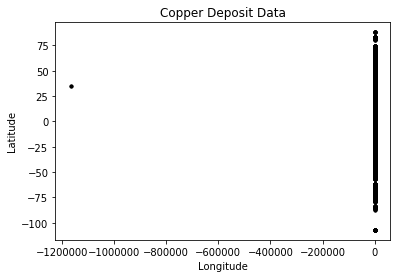

In [32]:
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Copper Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

This does not look right... It is a messy dataset! This is not uncommon. 
Maybe the Lats/Lons are stored as Norhtings/Eastings for some samples. 
Maybe they are missing a decimal place.

Anyway, Python is a great tool to clean things up! Let's investigate further.

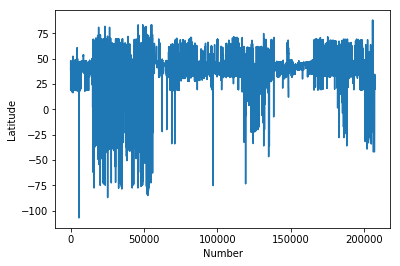

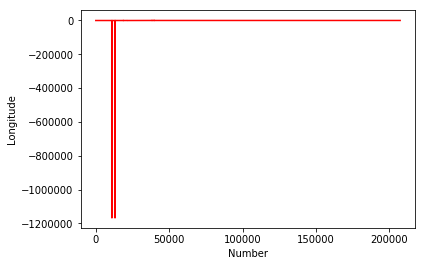

In [33]:
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

There are definitely some outliers with latitudes and longitudes. So let's restrict just our points to range -180:180 and -90:90.

In [34]:
#Clean up the data, remove anything outside lat lon extent

#Find all the "chemdata" column 1 (i.e. longitude) data points that are greater than -180, save it in a new variable
where_longitude_above_min = chemdata[:,1]>-180
cudata=chemdata[where_longitude_above_min]
#Repeat for less than 180
where_longitude_below_max = cudata[:,1]<180
cudata2=cudata[where_longitude_below_max]

We can make that a litte clearer for the latitude values to see what is actually going on...

In [35]:
goodlat=cudata2[:,0]<90
print(goodlat)

[ True  True  True ...  True  True  True]


In [36]:
goodlat.shape

(207422,)

In [37]:
cudata2

array([[ 3.92583e+01, -1.14992e+02,  1.11000e+02,  1.96000e+04],
       [ 3.92583e+01, -1.14992e+02,  1.11000e+02,  1.57000e+04],
       [ 4.12060e+01, -1.17272e+02,  1.05000e+02,  3.00000e+00],
       ...,
       [ 2.00530e+01,  1.17419e+02,  0.00000e+00,  3.00000e+01],
       [ 2.00530e+01,  1.17419e+02,  0.00000e+00,  3.30000e+01],
       [ 2.00530e+01,  1.17419e+02,  0.00000e+00,  3.50000e+01]])

In [38]:

#Repeat for latitudes less than 90
cudata3=cudata2[cudata2[:,0]<90]
#Repeat for greater than -90
cudata4=cudata3[cudata3[:,0]>-90]


print("We have removed", chemdata.shape[0]-cudata4.shape[0], "samples")

We have removed 47 samples


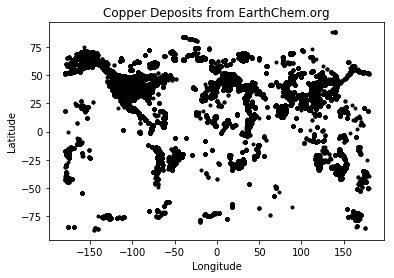

In [39]:
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


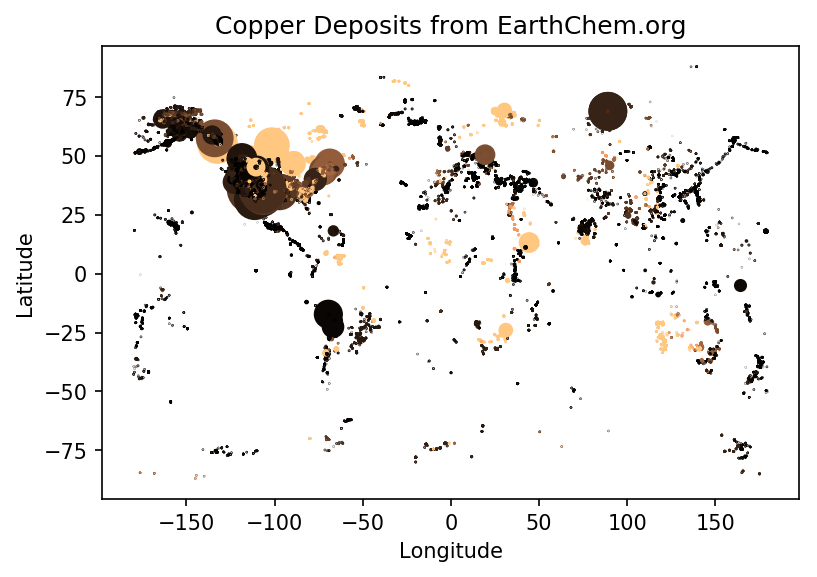

In [40]:
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]
copper=cudata4[:,2]

#lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=copper,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [41]:
import numpy as np
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    print("mean is:", u)
    s = np.std(data)
    print("std is:", s)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    print("removed:",np.shape(data)[0] - np.shape(filtered)[0])
    return filtered

In [42]:
filtered_age=reject_outliers(copper)

mean is: 557.0799352891255
std is: 961.7746954437551
removed: 20407


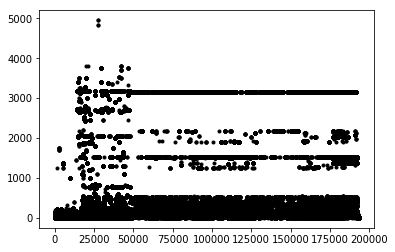

In [43]:
plt.plot(copper[copper>1],'k.')
plt.show()

### Let's make a nicer map

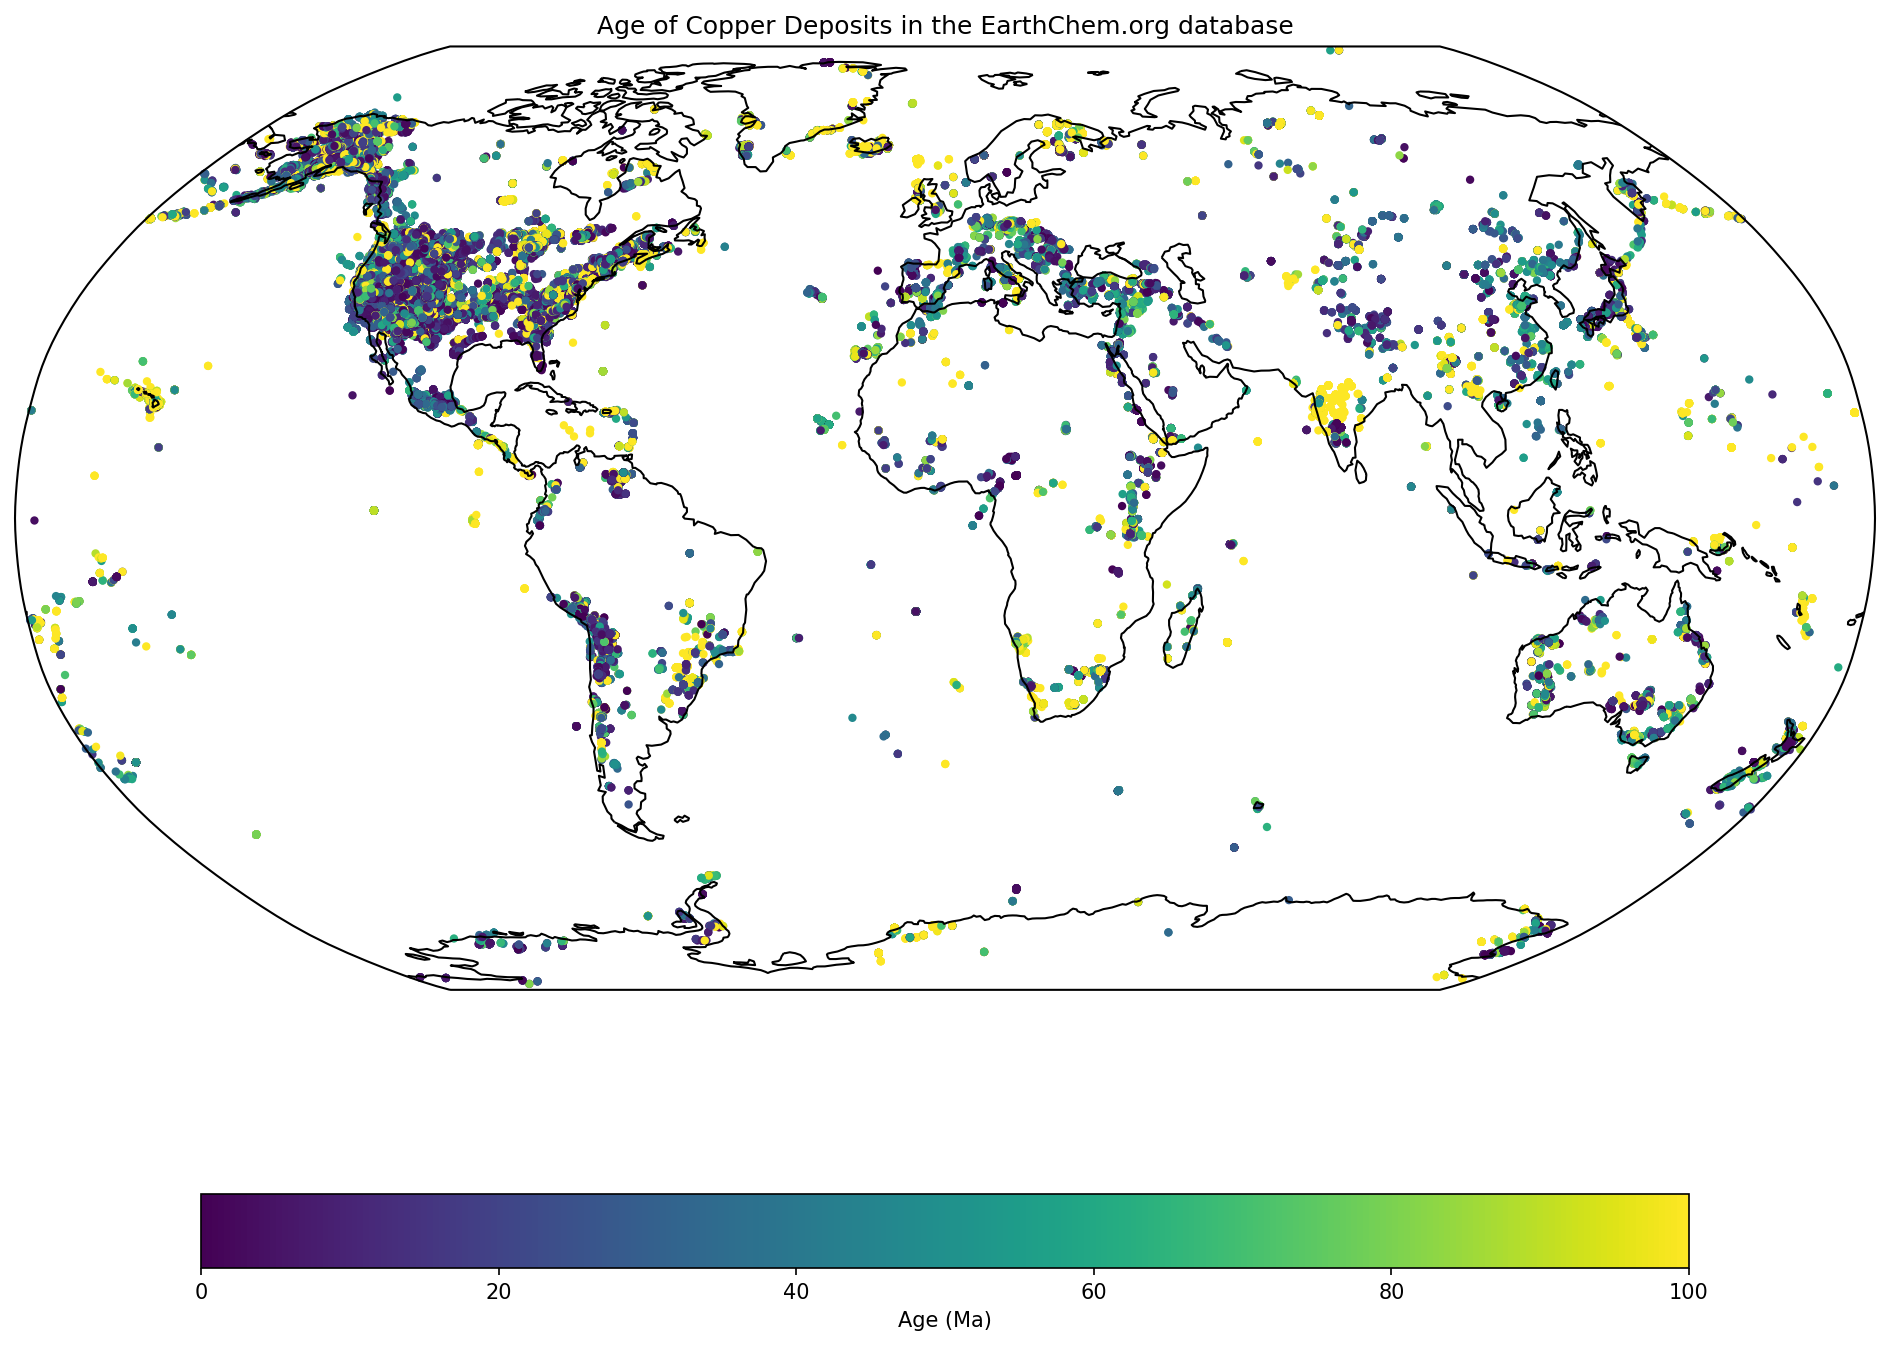

In [50]:
#Import another module called Cartopy - great for plotting things on globes
import cartopy
import cartopy.crs as ccrs
from sklearn import preprocessing

#Make new variables from our array (so it is easier to see what we are doing)
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

# Make the map axes, shade it and put down some other map symbols
ax = plt.axes(projection=ccrs.Robinson())   
ax.coastlines()

#Make a scatter plot of the data coloured by age. Restrict the colour range between 0 and 2000
mapscat = ax.scatter(longs,lats,marker=".", c=age, vmin=0, vmax=100, transform=ccrs.Geodetic())

#Add a colourbar, 
cbar = fig.colorbar(mapscat, orientation='horizontal', shrink=0.8)
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Copper Deposits in the EarthChem.org database')
plt.show()